### 10 Academy 
### Week-6 Challenge  
##### Credit Scoring BNPL, Exploratory Data Analysis 
##### Bati Bank 

Ethel.C

In [1]:
import sys

# Add the scripts and src directories to the Python path
scripts_dir = r'E:\DS+ML\AIM3\Practice\Week-6\scripts' #r'E:\DS+ML\AIM3\Week6\scripts'
src_dir = r'E:\DS+ML\AIM3\Practice\Week-6\src'#r'E:\DS+ML\AIM3\Week6\src'
# Update the file paths
csv_file_path = r"E:\DS+ML\AIM3\Week6\data\data.csv"
# Add directories to Python path if they are not already included
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)


##### 1. Load the Data 

In [2]:
from data_loader import load_data  
from data_analysis import (summary_statistics, distribution_numerical, 
                            distribution_categorical, correlation_analysis, outlier_detection,
                             handle_outliers, missing_value_detection)


In [3]:
df = load_data(csv_file_path)
df.head()

Data Loaded Successfully!
Shape of the dataset: (95662, 16)
Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

First few rows of the data:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
print(df['FraudResult'].value_counts())

FraudResult
0    95469
1      193
Name: count, dtype: int64


#### 2. Summary Statistics 

In [5]:
summary_statistics(df)

Summary Statistics:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN             NaN   
std                     NaN            NaN             NaN   
min                     NaN            NaN             NaN   
25%                     NaN            NaN             NaN   
50%                     NaN            NaN             NaN   
75%                     NaN            NaN             NaN   
max                     NaN            NaN             NaN   

             SubscriptionId       CustomerId CurrencyCode  CountryCode  \
count                 95662            95662        95662      95662.0   
unique                 3627             3742            1          NaN   
top     Subsc

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


##### 3. Distribution Numerical

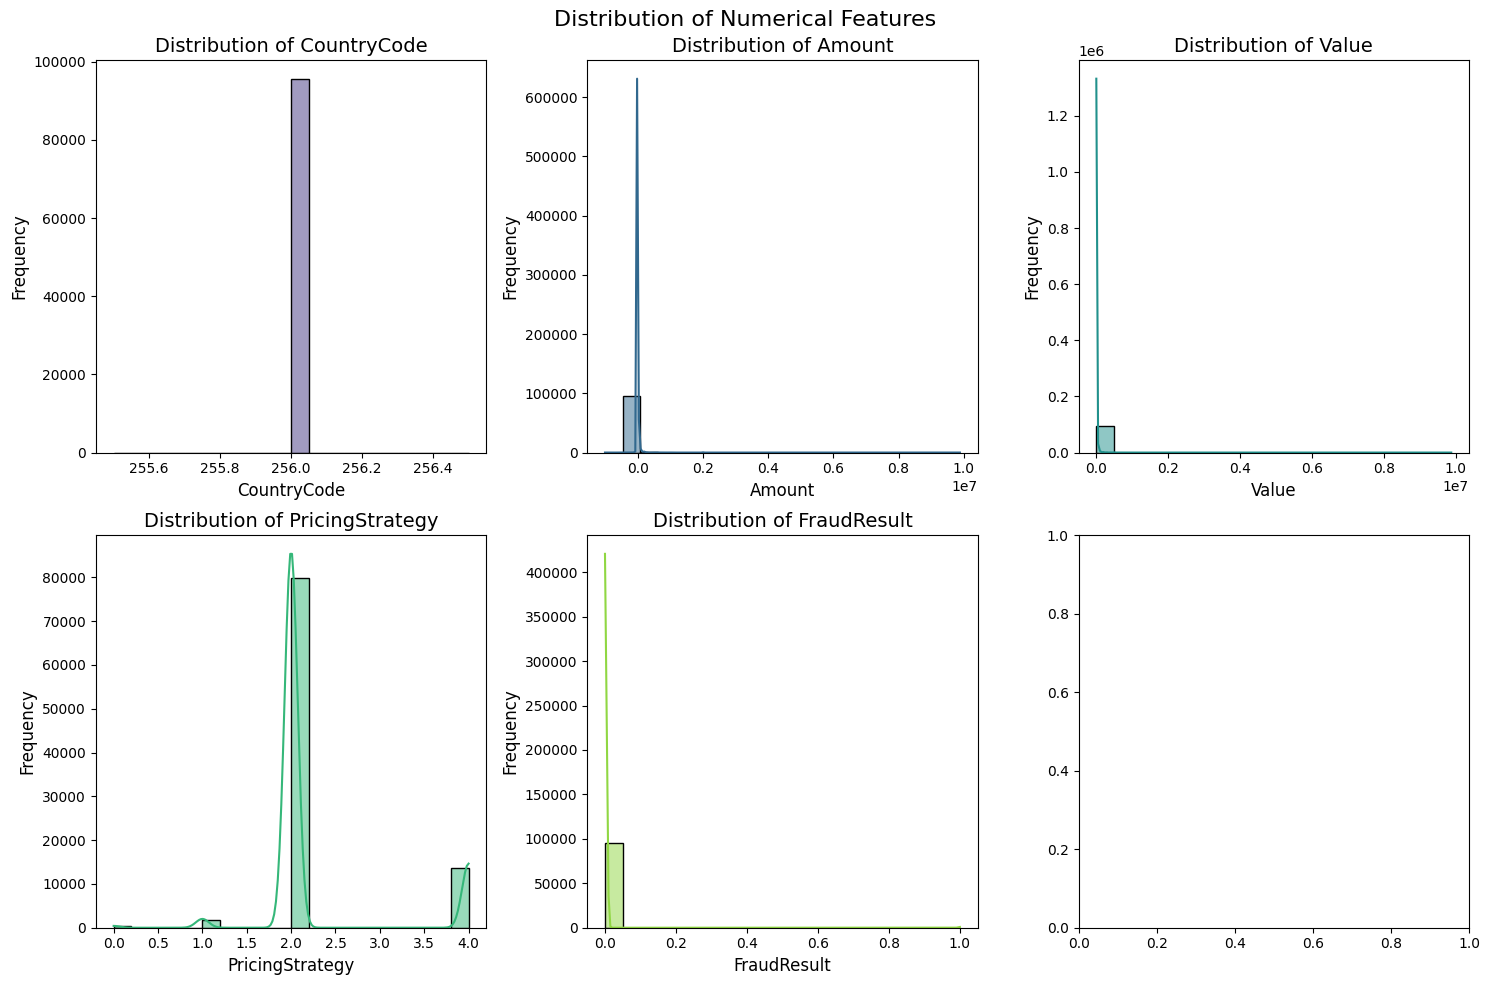

In [6]:
distribution_numerical(df)

#### 4. Distribution Categorical

In [7]:
distribution_categorical(df)

Distribution of Categorical Features:

TransactionId - Frequency Distribution:
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
                       ..
TransactionId_32860     1
TransactionId_139405    1
TransactionId_65784     1
TransactionId_8889      1
TransactionId_35670     1
Name: count, Length: 95662, dtype: int64
----------------------------------------

BatchId - Frequency Distribution:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_23939      1
BatchId_104215     1
BatchId_116411     1
BatchId_36631      1
BatchId_29317      1
Name: count, Length: 94809, dtype: int64
----------------------------------------

AccountId - Frequency Distribution:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                

#### 5. Correlation Analysis

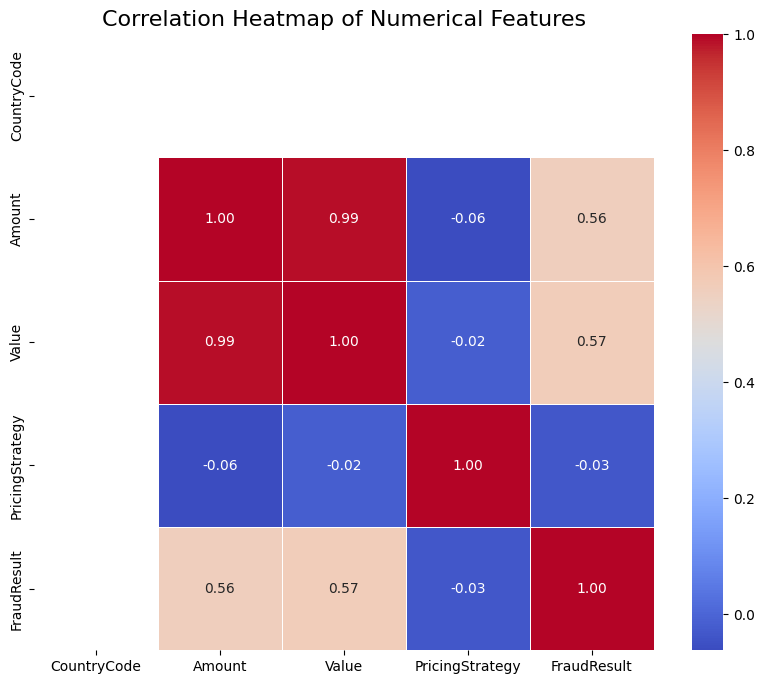

In [8]:
correlation_analysis(df)

##### 6. Missing Value Detection

In [9]:
missing_value_detection(df)

Missing Values Summary:
Empty DataFrame
Columns: [Missing Values, Percentage Missing]
Index: []


,Missing Values,Percentage Missing


NO MISSING VALUE 

#### 7. Outlier Detection

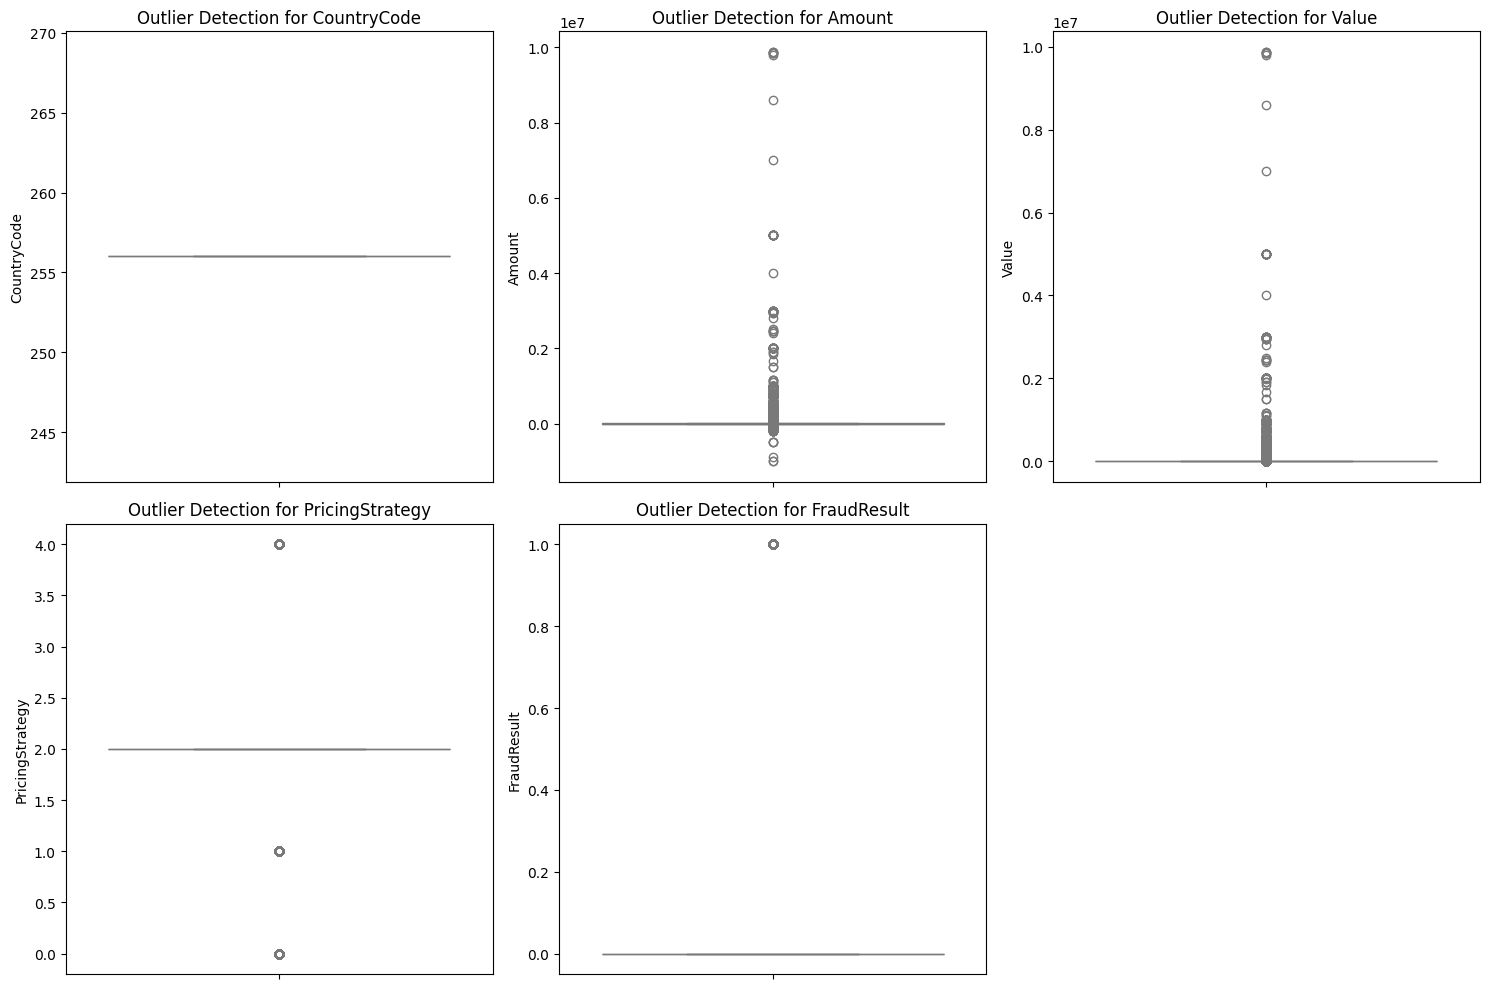

,Total Outliers,Lower Bound,Upper Bound
CountryCode,0,256.0,256.0
Amount,24441,-4325.0,7075.0
Value,9021,-6812.5,12087.5
PricingStrategy,15814,2.0,2.0
FraudResult,193,0.0,0.0


In [10]:
outlier_detection(df)

#### 7.1 Handling Outliers Using IQR Method for Numerical Columns 

If the dataset contains a FraudResult column and preserve_fraud is True, rows flagged as fraudulent (FraudResult=1) are excluded from outlier capping. This ensures that potentially meaningful fraud data is not altered.
Preserving fraud cases ensures critical patterns in fraudulent behavior remain intact for further analysis.

In [11]:
df_cleaned = handle_outliers(df, preserve_fraud=True)


Outliers handled using IQR method while preserving fraud cases.


#### 8 Saving Cleaned Data 

In [12]:
# Saving the cleaned data to a CSV file
df_cleaned.to_csv(r'E:\DS+ML\AIM3\Week6\data\data_cleaned.csv', index=False)


In [13]:
print(df_cleaned['FraudResult'].value_counts())

FraudResult
0    95469
1      193
Name: count, dtype: int64
